First 5 rows of the data:
            Time             FZ             C3            CZ            C4  \
0  471108.629297  259145.062500  255463.203125  280156.78125  297592.40625   
1  471108.634537  259071.937500  255626.625000  282968.28125  297913.18750   
2  471108.634549  259450.296875  255598.296875  283131.25000  297802.50000   
3  471108.636824  259770.734375  255431.093750  280456.65625  297436.09375   
4  471108.639355  259562.062500  255346.515625  278669.31250  297312.09375   

             PZ            PO7             OZ            PO8      AccX  \
0  268555.25000  255108.156250  232334.953125  239896.906250 -0.156006   
1  269795.59375  255109.765625  232506.515625  240036.203125 -0.143799   
2  269435.43750  255080.796875  232323.593750  239907.625000 -0.137451   
3  267998.68750  255079.453125  232064.765625  239711.656250 -0.133545   
4  267488.87500  255097.703125  232085.765625  239713.000000 -0.132324   

       AccY      AccZ      Gyro1     Gyro2      Gyro3    Bat

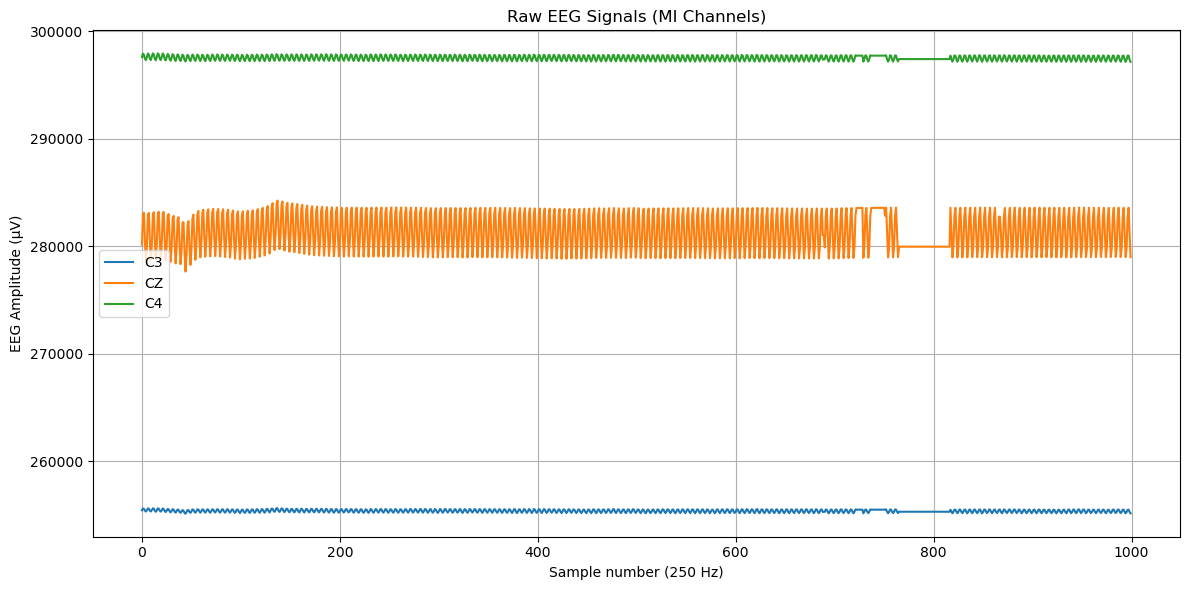

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define file path
file_path = r"C:\Users\zezom\PycharmProjects\HorusEye\Data\Raw\MI\train\S1\1\EEGdata.csv"  # Use raw string or double backslashes

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Load data
eeg_df = pd.read_csv(file_path)

# Display data structure
print("First 5 rows of the data:")
print(eeg_df.head())
print("\nColumns in data:", eeg_df.columns.tolist())

# EEG channels for MI (change these based on your dataset)
mi_channels = ['C3', 'CZ', 'C4']

# Check if channels exist in data
for ch in mi_channels:
    if ch not in eeg_df.columns:
        raise ValueError(f"Channel {ch} not found in the data columns!")

# Plot raw EEG signal
plt.figure(figsize=(12, 6))
for ch in mi_channels:
    plt.plot(eeg_df[ch][:1000], label=ch)  # Plot first 4 seconds (1000 samples at 250 Hz)

plt.xlabel('Sample number (250 Hz)')
plt.ylabel('EEG Amplitude (µV)')
plt.title('Raw EEG Signals (MI Channels)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# List of relevant channels for MI
mi_channels = ['C3', 'CZ', 'C4']

# Select only these channels from the data
eeg_mi_df = eeg_df[mi_channels]

# Optional: Check the shape and preview
print(eeg_mi_df.shape)
print(eeg_mi_df.head())


(22500, 3)
              C3            CZ            C4
0  255463.203125  280156.78125  297592.40625
1  255626.625000  282968.28125  297913.18750
2  255598.296875  283131.25000  297802.50000
3  255431.093750  280456.65625  297436.09375
4  255346.515625  278669.31250  297312.09375


In [4]:
# Step 3: Re-referencing EEG signals (Average Reference)

# Select MI channels from the main DataFrame
mi_channels = ['C3', 'CZ', 'C4']
eeg_mi_df = eeg_df[mi_channels].copy()  # Always use .copy() when making modifications

# Compute average reference across selected MI channels (row-wise mean)
eeg_mi_df['Average'] = eeg_mi_df.mean(axis=1)

# Subtract average reference from each channel to get re-referenced signal
for ch in mi_channels:
    eeg_mi_df[ch + '_ref'] = eeg_mi_df[ch] - eeg_mi_df['Average']

# Keep only re-referenced channels for further analysis
eeg_mi_ref = eeg_mi_df[[ch + '_ref' for ch in mi_channels]]

# Preview the re-referenced data
print("First 5 rows of re-referenced EEG data:")
print(eeg_mi_ref.head())


First 5 rows of re-referenced EEG data:
         C3_ref       CZ_ref        C4_ref
0 -22274.260417  2419.317708  19854.942708
1 -23209.406250  4132.250000  19077.156250
2 -23245.718750  4287.234375  18958.484375
3 -22343.520833  2682.041667  19661.479167
4 -21762.791667  1560.005208  20202.786458


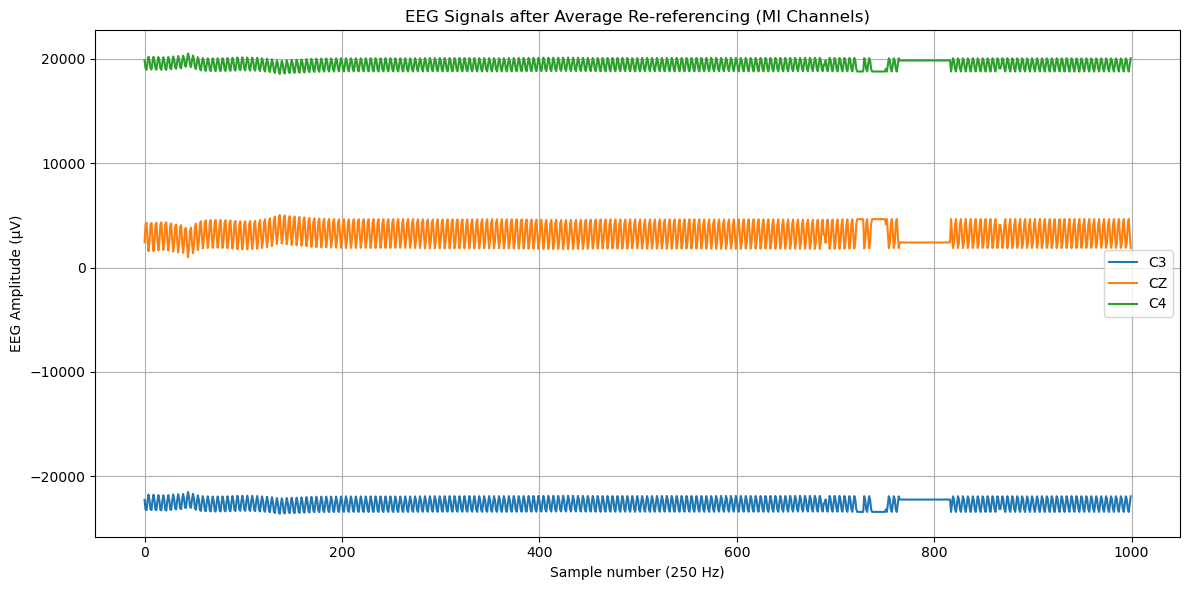

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for ch in [ch + '_ref' for ch in mi_channels]:
    plt.plot(eeg_mi_ref[ch][:1000], label=ch.replace('_ref',''))
plt.xlabel('Sample number (250 Hz)')
plt.ylabel('EEG Amplitude (µV)')
plt.title('EEG Signals after Average Re-referencing (MI Channels)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
